<a href="https://colab.research.google.com/github/eevv2333/Study-Projects/blob/main/%E2%80%9CLoan_Prediction(%E4%B8%AD%E8%8B%B1%E5%8F%8C%E8%AF%AD%EF%BC%89_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 项目背景
在房贷审批流程中，银行需要考虑贷款申请人的各种信息，比如家庭情况、经济情况、房子情况等等，经过综合分析这些因素后决定是否要贷款给申请人，即审批通过还是拒绝。

在大部分情况下，只需要一些基本的信息便可以大致判断申请人是否符合放贷资格。银行希望希望能够根据客户提供的详细信息（在线上填写申请表格），自动化贷款资格审批流程，并且将结果实时反馈给客户。

**问题：贷款申请否通过？**
这是一个生活中非常常见的二分类问题，基本上所有的银行每天都在处理这个问题，如果可以将这个过程自动化，便可一大大减少人力和时间成本。

# 建立假设（Hypothesis Generation）
很多项目流程都忽略了这一步，但是建立基本的假设更便于之后确定处理和分析数据资料的方向、范围。针对项目的问题：**贷款申请是通过还是拒绝？** 需要考虑是什么因素对贷款有影响。 这里，因变量（Y）是贷款；自变量（X）是各种对贷款有影响的因素。

这里按照我们的对于放贷的理解，作出几点假设：
1）工资：工资越高，贷款更容易通过；
2）贷款期限和金额：贷款期限越短、金额越少的越容易通过；
3）EMI：monthly incom  还贷额占月收入比例,占比越低越容易通过；
4）贷款历史：已偿清之前贷款的申请人，贷款通过的机率更大。


# 数据探索性分析 EDA
## 1. 了解数据（Understand the Data）

In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [2]:
#Reading Data
test=pd.read_csv('https://raw.githubusercontent.com/eevv2333/Study-Projects/main/%E9%93%B6%E8%A1%8C%E8%B4%B7%E6%AC%BE%E9%A2%84%E6%B5%8BLoan%20Prediction/test-file.csv')
train=pd.read_csv('https://raw.githubusercontent.com/eevv2333/Study-Projects/main/%E9%93%B6%E8%A1%8C%E8%B4%B7%E6%AC%BE%E9%A2%84%E6%B5%8BLoan%20Prediction/train_ctrUa4K.csv')

#make a copy
train_original = train.copy()
test_original=test.copy()

print(train.columns)  #check the columns:Train.data has 'Loan_Status'
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [3]:
# Print data types for each variable train.dtypes
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [4]:
print(train.shape)
print(test.shape)  #We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

(614, 13)
(367, 12)


训练集Train 一共有614行，13列； Test测试集是367行，12列。 其中，训练集中每一列内容如下：

| 特征名称  |             数据格式|  特征含义|
|--|--|--|
| Loan_ID  |              object|  贷款ID|
| Gender      |          object   |    性别|
| Married     |    object    | 婚姻情况|
| Dependents            | object | 赡养人数|
| Education         |     object| 教育情况|
| Self_Employed        |  object| 是否自雇人士|
| ApplicantIncome      |      int64   | 申请人收入|
| CoapplicantIncome     |   float64   | 共同申请人收入|
   | LoanAmount             |  float64   | 贷款金额|
 | Loan_Amount_Term     |  float64|  贷款期限|
 | Credit_History       |  float64|  信用记录|
|  Property_Area      |     object|  所在区域|
|  Loan_Status        |     object|  贷款状况 |


## 2. 单变量分析（Univariate Analysis）
### 2.1 目标变量（Target）
首先需要了解目标变量，贷款情况（通过还是拒绝）。由于这是个分类变量，因此分析方法采取计算频率、百分比和柱状图。

We will first look at the target variable, i.e., **Loan_Status**. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


<Axes: title={'center': 'Loan Status'}>

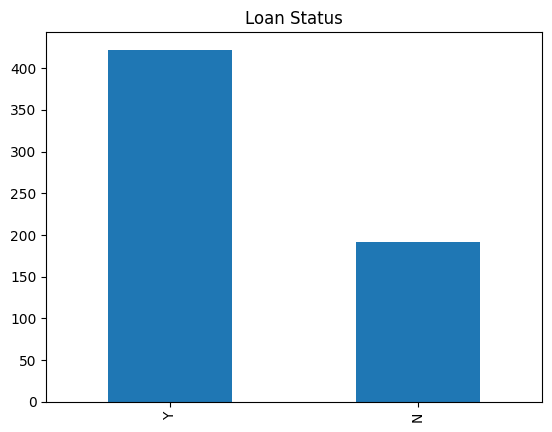

In [5]:
#univariate Analysis
print(train['Loan_Status'].value_counts())
# Normalize can be set to True to print proportions instead of number
print(train['Loan_Status'].value_counts(normalize=True))
train['Loan_Status'].value_counts().plot.bar(title='Loan Status')

* 422个申请人，约70%的贷款申请都是通过的。

### 2.2 自变量（Independent Variable）
了解完目标变量，我们接着分析其他的数据特征。
数据特征可以分成三类：分类特征、序数特征、数值特征
* **Categorical features**: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
* **Ordinal features**: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
* **Numerical features**: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term）

#### 2.2.1 分类特征 （Categorical Features)

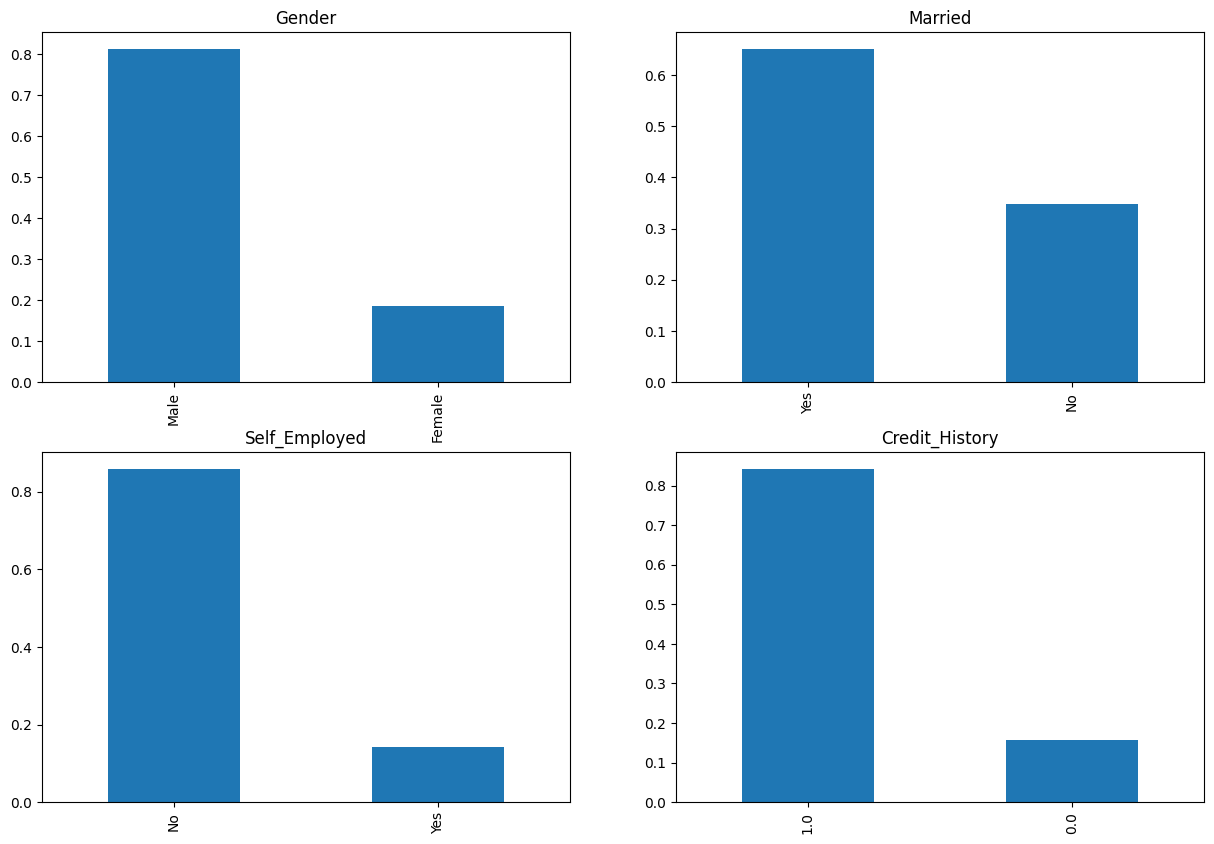

In [6]:
#Independent Variable (Categorical)
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

   * 80% applicants in the dataset are male.
   * Around 65% of the applicants in the dataset are married.
   * Around 15% applicants in the dataset are self employed.    
   * Around 85% applicants have repaid their debts.

四个分类特征的柱状图可见：
- 近80%的申请人是男性，
- 大约65%的申请人是已婚；
- 15%是自雇人士
- 85%的申请人有信用记录。

#### 2.2.2 序数特征 （Ordinal features:）
序数特征是分类特征中有一定顺序/规律的特征，比如教育程度，家庭人数等，所在区域等。

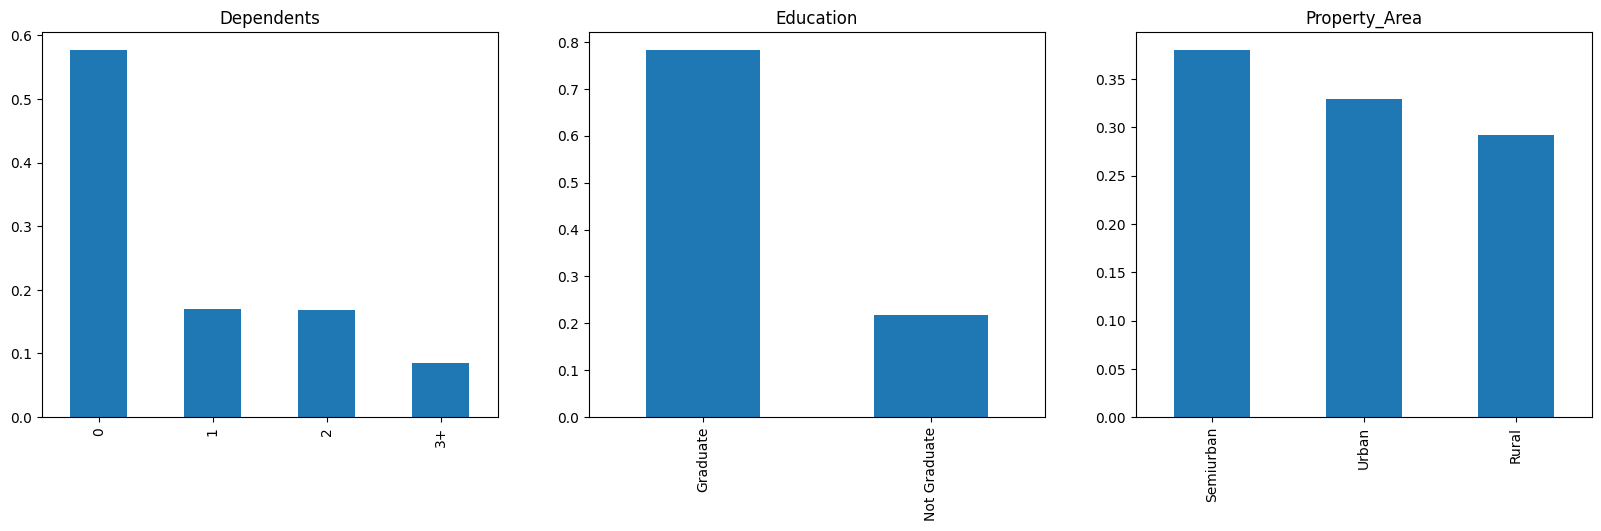

In [7]:
#ordinary
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5), title= 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

* Most of the applicants don’t have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

- 大部分的申请人赡养人数为0，即没有需要他们提供生活资金的人；
- 大约80%的申请人是大学毕业生；
- 绝大部分的申请贷款的房产位于自半城市地区；
- 80%的贷款期限都是30年，不足10%的是15年 。

#### 2.2.3 数值特征
在案例中，有三个重要的数值型变量特征：申请人收入ApplicantIncome, 共同申请人收入CoapplicantIncome, 贷款金额LoanAmount； 可以使用直方图和箱型图分析数值特征的分布情况。

<ipython-input-8-bde555d73af7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome']);


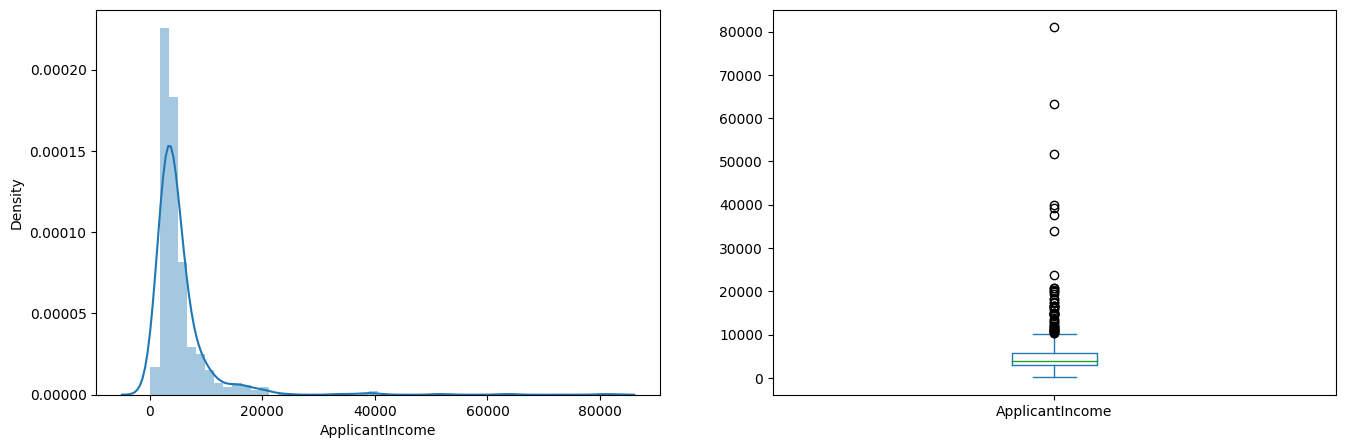

In [8]:
# Numerical Variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is **towards left** which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

- 申请人收入ApplicantIncome:
从直方图可以看到整体分布是左偏的，并不符合正态分布，因此需要在后面一步中对数据做处理。

Text(0.5, 0.98, '')

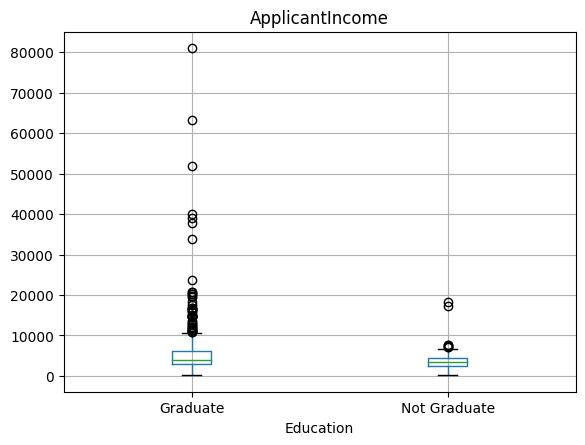

In [9]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle('')

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

<ipython-input-10-94f9290d73be>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((train['CoapplicantIncome']))


<Axes: >

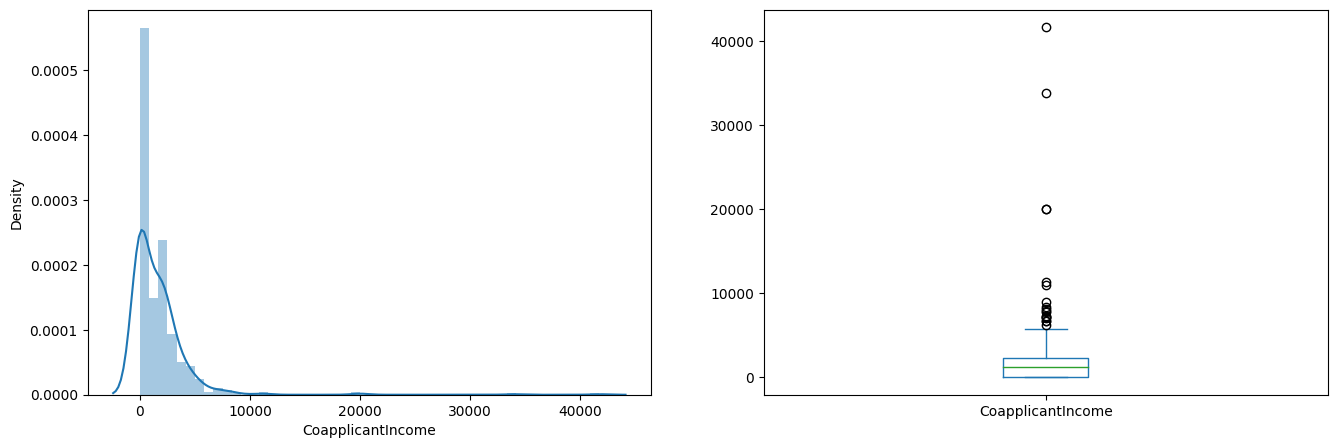

In [10]:
plt.figure(1)
plt.subplot(121)
sns.distplot((train['CoapplicantIncome']))
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

a similar distribution of income. Majority of coapplicant’s income ranges from
0 to 5000. We also see a lot of outliners and it is not normally distributed.

- 共同申请人收入CoapplicantIncome: 大部分共同申请的的收入在0-5000之间；和上面申请人收入的分布类似，也不是正态分布的，并且也有很多离散值。

<ipython-input-11-5dd3e53ccb50>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((train['LoanAmount']))


<Axes: >

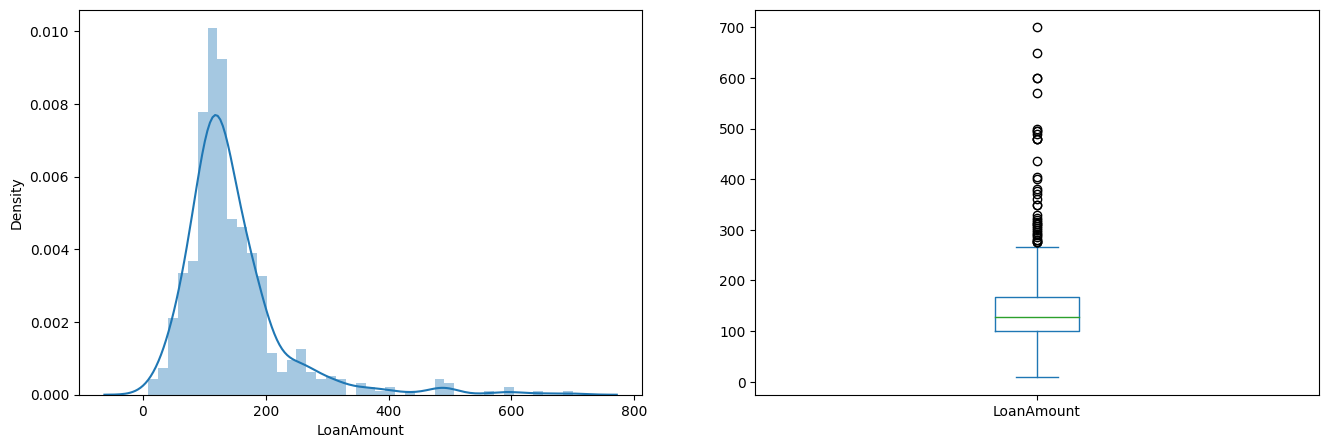

In [11]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot((train['LoanAmount']))
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.
- 贷款金额（Loan Amount): 贷款金额的分布接近于正太分布，但也有非常多的离散值。

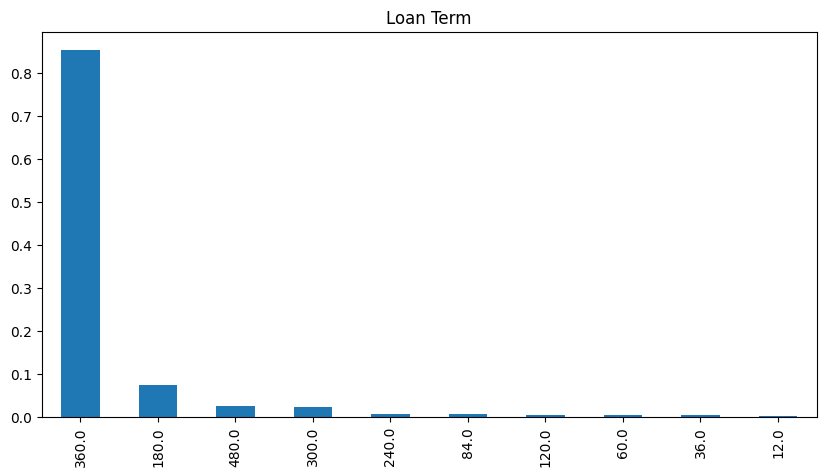

In [12]:
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(figsize=(10,5),title= 'Loan Term')
plt.show()

## 3. 双/多变量分析（Bivariate Analysis)
回顾我们之前的假设：
- 高收入的申请人更高几率通过。
- 贷款金额越少越容易通过；
- 贷款期限越短越容易。

多变量分析方法可以根据特征的类型区分：数值特征之间、分类特征之间、分类特征和数值特征。

我们的目标是探索各种因素对目标变量（Loan_Status）的影响，在2.单变量分析里，我们了解了各类特征的基本情况，在多变量分析里，我们将这些特征和目标变量组合起来分析


Applicants with high income should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.
Lets try to test the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.


### 3.1 分类特征&目标变量 （Categorical Independent Variable vs Target Variable）
使用堆积柱状图，直接将结果用百分比展示，查看各个分类特征对目标变量（Loan_Status）的影响。
First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

<Axes: xlabel='Gender'>

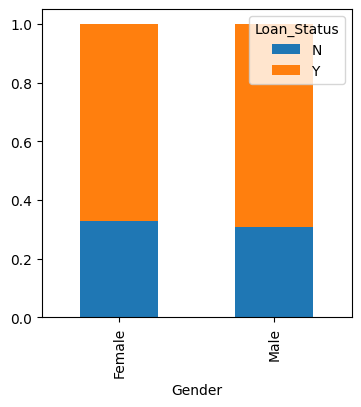

In [13]:
#Target V & categorical V
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))


<Axes: xlabel='Self_Employed'>

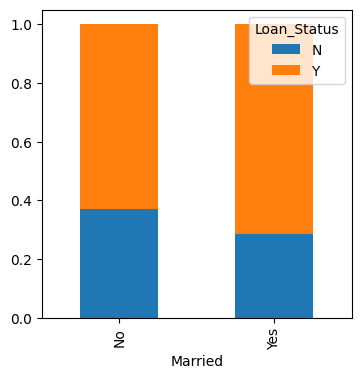

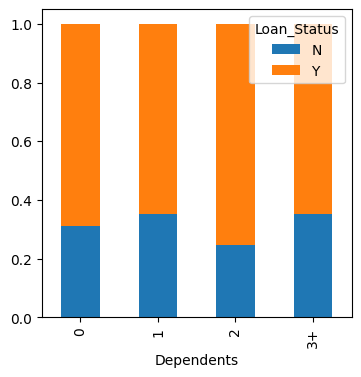

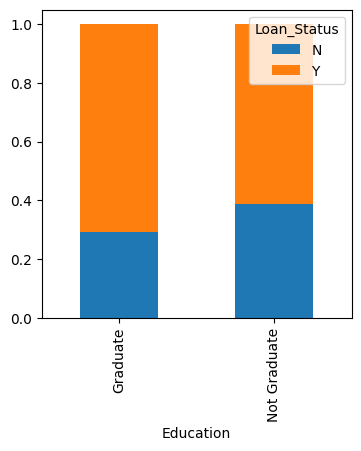

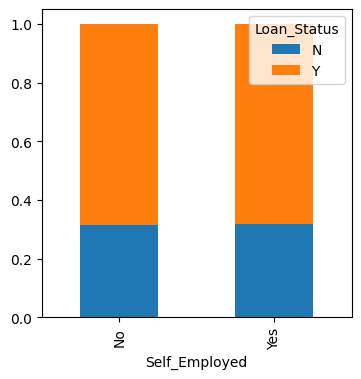

In [14]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

* Proportion of married applicants is higher for the approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

<Axes: xlabel='Property_Area'>

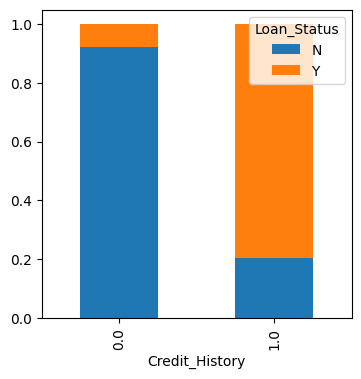

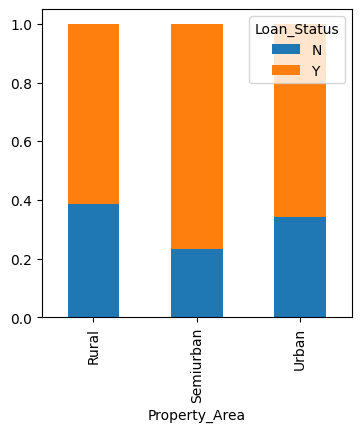

In [15]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

* It seems people with credit history as 1 are more likely to get their loans approved.
* Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

* 已婚的申请人更容易获得通过；
* 赡养人数为1 或者3个以上的申请人，贷款通过率相似；
* 自雇和非自雇的申请人通过率相似；
* 有信用历史的人更容易获得贷款；
* 在半城市化区域的放贷申请，比农村和城市地区更容易通过；
* 大学毕业的申请人的通过率比没有毕业的要高。

### 3.2 数值特征&目标变量 （Numerical Independent Variable vs Target Variable）

对于数值型变量，最常用的分析方法是使用分类（Bin），比如将收入划分为低、中、高、超高四个类别，再画堆积图具体分析。

这里分析的数值特征有：申请人/共同申请人的收入；贷款金额

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<Axes: xlabel='Loan_Status'>

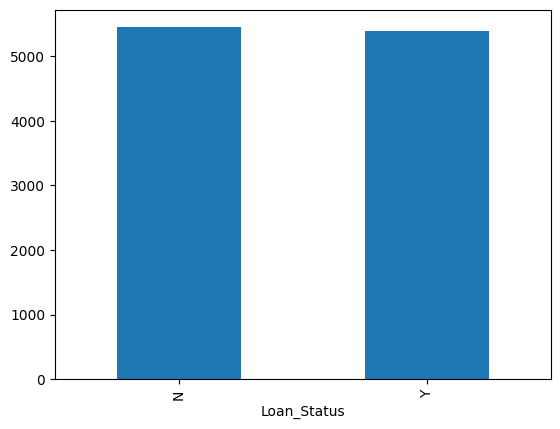

In [16]:
#mean
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

* 从平均数上看，贷款被拒绝和通过的申请人的平均收入一致，
* 单看平均数还不能证明申请人的收入并不影响贷款结果，需要进一步用BIN分析。

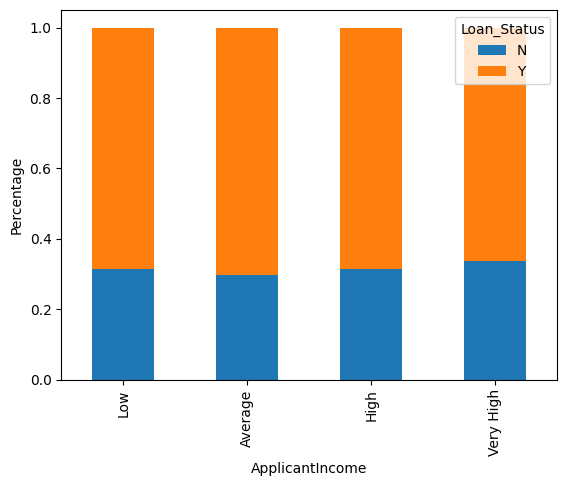

In [17]:
#bin
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

it can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

这里将收入分成了低、平均、高和非常高四类，可以发现四类的通过率都是一致的，意味着申请的收入并不影响贷款审批，这与我们之前的假设：’收入越高越容果通过‘不一致。

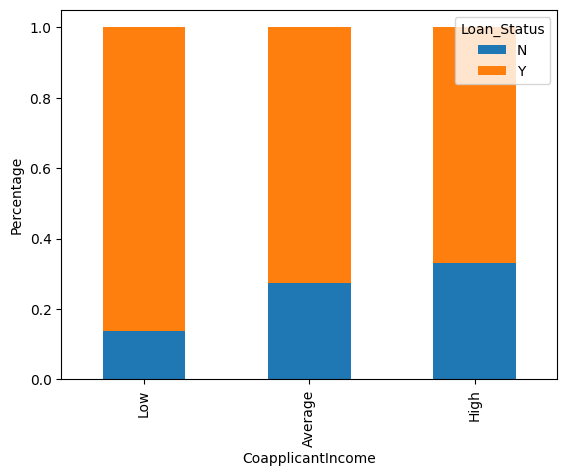

In [18]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

同样的方法，将共同申请人的收入分成高中低三类。这里可以发现，共同申请人收入越低，反而更容易通过。这里与我们的经验常识不符。
这可能是因为许多申请人并没有共同申请人（共同申请人为0）所以在审批流程中，这些案例无需考虑共同申请人的收入。

因此，我们在这里引进一个新的特征（汇总收入），将申请人和共同申请人的收入加总，作为一个新的变量。



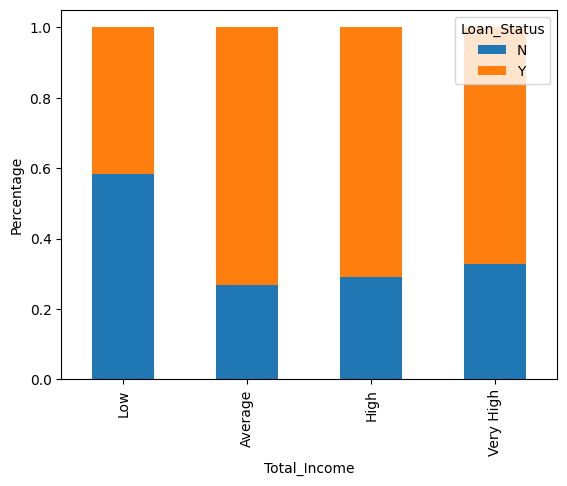

In [19]:
# combine the Applicant Income and Coapplicant Income
#and see the combined effect of Total Income on the Loan_Status.
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')


We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

引入新特征（汇总收入）之后，我们可以看到，相比平均、高和非常高三列，第一列‘低’明显通过率更低，被拒绝的可能性接近60%。 总收入越低，贷款被拒绝的可能性越高。

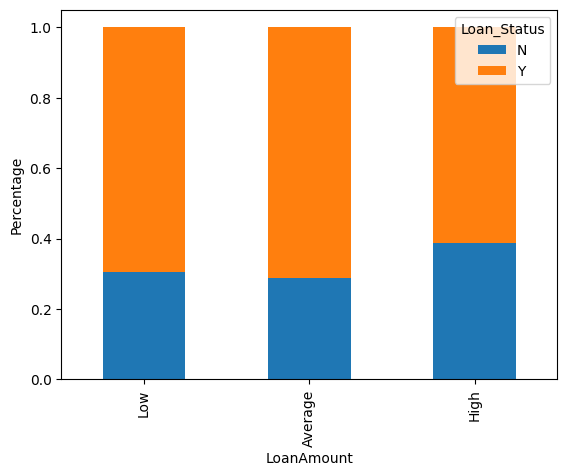

In [20]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

* It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

- 使用相同的手段将贷款金额分成三组，图片展示的结果也和我们之前的假设一致，金额低的贷款更容易通过。第三列的蓝色部分（被拒绝）更高。


### 3.3 相关性
为了进一步比较各类特征的相关性，可以画热力图表示特征之间的相关性。由于很多模型（比如回归模型），只能处理数字，所以需要将文字类型的特征描述转换成数字：

首先，需要将有3个以上不同类别的特征，改成只有三个类别，并将转换成数值型；其次，需要把目标变量（Loan_status)的两个类别，转换成0和1。

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [21]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [22]:
print(train['Dependents'])

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object


<ipython-input-23-be54495f27fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix=train.corr()


<Axes: >

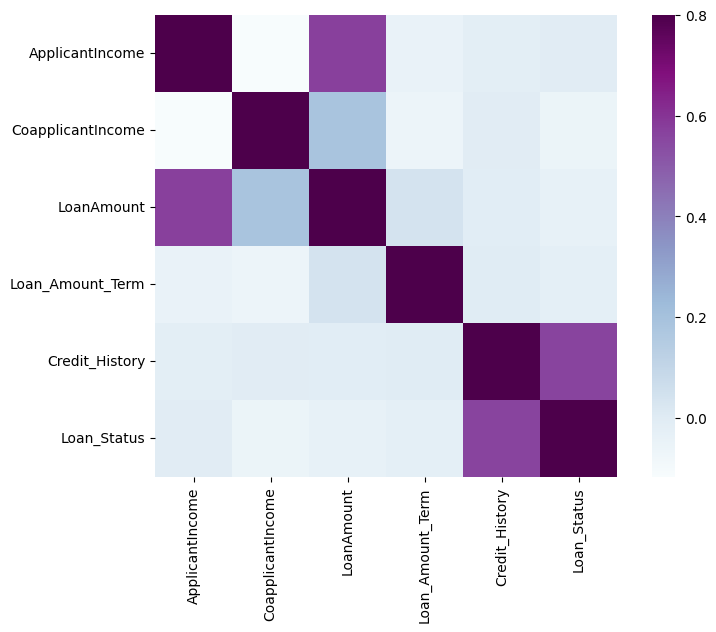

In [23]:
#heat map
matrix=train.corr()
f, ax=plt.subplots(figsize=(9, 6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

- 参考右边图例，颜色越深代表相关系数越接高。
- 相关性最高的变量是（申请人收入-贷款金额）和（贷款历史-贷款情况）
- 贷款金额与共同申请人的收入也具有一定的相关性


## 4. 处理缺失值和异常值（Missing Value and Outlier Treatment）

### 4.1 缺失值处理（Missing value imputation）
1. list out feature-wise count of missing values.
2. We can consider these methods to fill the missing values:
    * For numerical variables: imputation using mean or median
    * For categorical variables: imputation using mode
3. check whether all the missing values are filled in the dataset.


1. 列出所有特征缺失值个数
2. 插补缺失值：
	-	数值型变量特征使用中位数或者平均值
	-	分类变量用众数插补
3.  检查数据集是否还有缺失值


In [24]:
# 1. list out
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


There are missing values in **Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History** features.

性别、婚姻情况、亲属、是否自雇认识，贷款金额，贷款期限和贷款历史，这些特征都有缺失值。


In [25]:
# 2. fill the missing values:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [26]:
#  fill the missing values in Loan_Amount_Term
#print(train['Loan_Amount_Term'].value_counts()) #查看各种数据的次数统计
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

look at the value count of the Loan amount term variable.
It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable **using the mode(360.0) of this variable**.

In [27]:
# Numerical variable, use mean or median to impute the missing values.
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

**!** 上下两行要分开
根据每个特征的具体情况，采用不同的方法处理缺失值。
- 众数mode()
- 中位数 median()
- 平均数 mean()

In [28]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
#using the method to replace the test.file
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)


最后检查是否处理完所有缺失值，同时测试集的缺失值也要用同样方法处理

### 4.2 离散值处理 Outlier Treatment
One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

根据之前的分析，案例中的数值特征有非常大的离散值，导致整体分布偏斜。最基本的解决方法是用对数log。对数变换几乎对小的数值没什么影响，但可以将大的数值降低。经过对数变换后，就可以得到一个正态分布图。

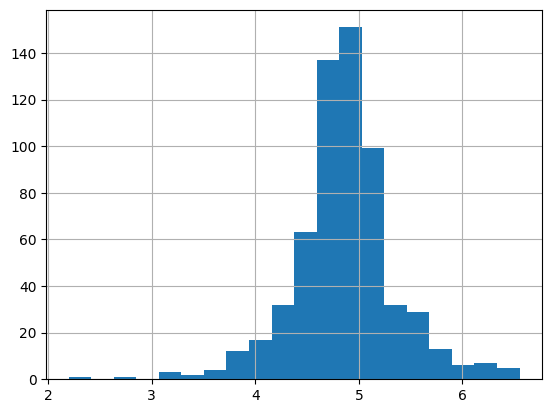

In [30]:
####Outliner
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

# 建立模型 Model Building : Part I

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

To learn further about sklearn, refer here: http://scikit-learn.org/stable/tutorial/index.html

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.



## 1. 数据集切分

第一步是需要将数据集切分，将目标变量和其他数据变量分开。

In [31]:
###model
train = train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

X=train.drop('Loan_Status',1)
y=train.Loan_Status

<ipython-input-31-f922bba74b52>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=train.drop('Loan_Status',1)


## 2. 虚拟变量（dummy variables）

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.
As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

虚拟变量（dummy variables）又叫名义变量或哑变量。 虚拟变量将分类变量转成一系列的0和1 ，使得特征更便于量化和比较。

例如，性别变量有两个类别：‘男性’和‘女性’。
因为逻辑回归职能处理数值，所以需要将‘男性’和‘女性’转换成数字。当我们将这些特征Dummy化，性别这个变量就会转换两个变量（“性别_男性“和“性别_女性”）。
当样本（申请人）为男性时：“性别_男性“=1 ;“性别_女性”=0。

In [32]:
#Turn Dummy variables for the categorical variables; Gender_Male= 0 if Feamel ,and 1 for male
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [33]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1


##  3. 验证（validation）
Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

在建模过程中，我们有个训练集（Train）和一个测试集（Test）。
但是如何去验证这个模型是否准确呢？
一种方法是将训练集分成两组数据：训练集和验证集；
使用训练集去训练模型，再用验证集去验证模型的准确率。
这种方法在真实的样本结果上验证模型的预测结果是否准确。
Train有真实的结果Y，即loan Status, 但是测试集test没有结果，需要我们用模型去预测。

使用`train_test_split()`划分验证集。

In [34]:
from sklearn.model_selection import train_test_split
#import LogisticReression and accuracy_score from sklearn and fit the lofistic regression model
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

## 4. 训练模型 （Training）

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          verbose=0, warm_start=False)

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. To learn about other parameters, refer here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Let’s predict the Loan_Status for validation set and calculate its accuracy.

## 5. 计算准确率(Predicting)

In [37]:
#predict the Loan_status for validation set and calculate its accuracy
pred_cv = model.predict(x_cv)
#calculate how accurate our preditionsare by calculating the acuracy
accuracy_score(y_cv,pred_cv)

0.7243243243243244

Orginal: 0.7945945945945946

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

## 6. 生成提交文档(Submission)

In [ ]:
#make predictions for the test dataset
pred_test = model.predict(test)
#import submission file which we have to submit on the solution checker
submission=pd.read_csv('Sample_Submission_49d68Cx.csv')

submission['Loan_Status']=pred_test
submission['Loan_Status']=test_original['Loan_ID']

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv') #生成logistic.csv

Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

From this submission we got an accuracy of 0.7847 on the leaderboard.

Instead of creating validation set, we can also make use of cross validation to validate our predictions. We will learn about this technique in next section.

## Part I 总结
这一部分建立了一个基础的模型，准确率为81%。但是只划分了一次数据，这个模型的结果是否可靠呢？另外，是否还有其他方法继续优化模型提高准确性呢？
下面，会继续使用分层交叉验证、特征工程以及其他模型算法进行建模。

# 分层交叉验证（stratified k-folds cross validation）

分层交叉验证，就是将上面的验证步骤重复多次。避免了只划分一次数据集，会导致结果具有偶然性。

下面是k=5时分层k-fold验证的示意图：将数据划分了五次，同样的训练和验证流程做5次，得到5个评估结果。
[在这里插入图片描述](https://img-blog.csdnimg.cn/20200810123021607.png)


To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

The validation set approach
k-fold cross validation
Leave one out cross validation (LOOCV)
Stratified k-fold cross validation
If you wish to know more about validation techniques, then please refer this article: https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In this section we will learn about stratified k-fold cross validation. Let us understand how it works:

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
It is generally a better approach when dealing with both bias and variance.
A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.
Below is the visualization of a stratified k-fold validation when k=5.


In [38]:
#Validation ...Stratified K Fold
from sklearn.model_selection import StratifiedKFold

In [39]:
# make a cross validation logistic model with stratified 5 folds and make predictions for test dataset
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

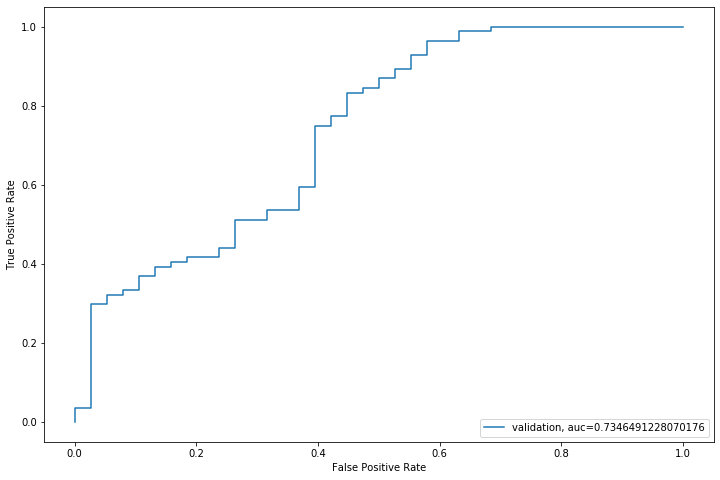

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

From this submission we got an accuracy of 0.78472 on the leaderboard. Now we will try to improve this accuracy using different approaches.

## Feature Engineering
Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

* Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
* EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
* Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

根据业务经验，我们可以构造几个可能影响到目标变量的新特征：

- 总收入，这个特征我们之前有讨论过的，将申请人和共同申请人的收入加总。
- EMI。是指申请人每月为偿还贷款而支付的金额。这个变量背后的想法是，有高贷款占比的人可能会发现很难偿还贷款。我们可以通过贷款金额与贷款金额期限的比率来计算EMI。
- 剩余收入- 值得是每月还完贷款后剩余的收入。 高剩余收入的申请人更有可能获批贷款。

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

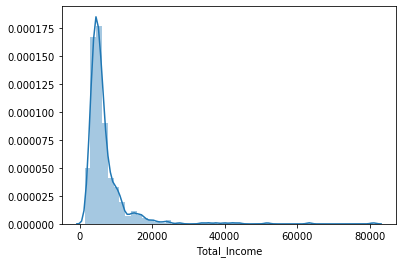

In [ ]:
sns.distplot(train['Total_Income']);

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

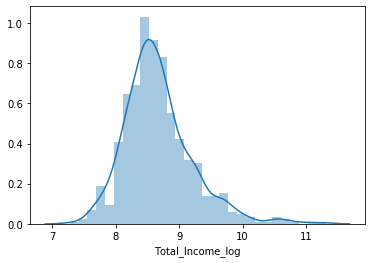

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

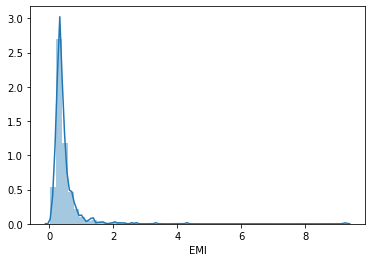

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
#check the distribution of EMI variable.
sns.distplot(train['EMI']);

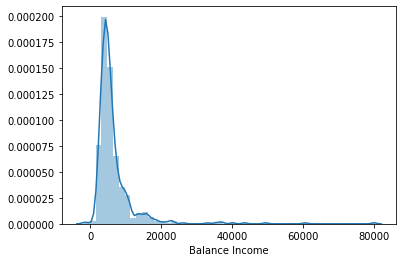

In [ ]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
# Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

Let us now **drop the variables** which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.
最后，删掉原来的变量，旧特征和新特征会高度相关，所以需要移除就特征降低噪音。

In [ ]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

## Model Building : Part II
After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.

* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost

构建了新特征后，重新使用更复杂的模型建模。


In [ ]:
#prepare the data for feeding into the models.
X = train.drop('Loan_Status',1)
y = train.Loan_Status                # Save target variable in separate dataset

### Logistic Regression

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)     ######
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


In [ ]:
(0.7886178861788617+0.6910569105691057+0.6666666666666666+0.7804878048780488
+0.680327868852459)/5

0.7214314274290283

原答案：
1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7540983606557377

5 of kfold 5
accuracy_score 0.8278688524590164
The mean validation accuracy for this model is 0.812

In [ ]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

From this submission we got an accuracy of 0.7847 on the leaderboard. So we can infer feature engineering has **not improved the model**. Let us look at some other algorithms.

## Decision Tree
Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

For detailed explanation visit https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#six



In [ ]:
from sklearn import tree

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [ ]:
(0.7398373983739838+0.6991869918699187+0.7560975609756098+0.7073170731707317+0.6721311475409836)/5

0.7149140343862455

原来答案：
1 of kfold 5
accuracy_score 0.6693548387096774

2 of kfold 5
accuracy_score 0.7661290322580645

3 of kfold 5
accuracy_score 0.7213114754098361

4 of kfold 5
accuracy_score 0.6475409836065574

5 of kfold 5
accuracy_score 0.7131147540983607
The mean validation accuracy for this model is 0.69

In [ ]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

We got an accuracy of 0.63 which is much lesser than the accuracy from logistic regression model. So let’s build another model, i.e. Random Forest, a tree based ensemble algorithm and try to improve our model by improving the accuracy.

### Random Forest
* RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
* For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
* Final prediction can be a function of all the predictions made by the individual learners.
* In case of regression problem, the final prediction can be mean of all the predictions.

For detailed explanation visit this article https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


In [ ]:
0.8292682926829268+ 0.8130081300813008+0.7723577235772358+0.8048780487804879+ 0.7540983606557377

3.973610555777689

In [ ]:
3.973610555777689/5

0.7947221111555378

Orginal answer:
1 of kfold 5
accuracy_score 0.8145161290322581

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.7540983606557377

4 of kfold 5
accuracy_score 0.7213114754098361

5 of kfold 5
accuracy_score 0.819672131147541
The mean validation accuracy for this model is 0.766

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

可以看到，三种模型的效果都不是很好，可以进一步使用grid search给随记森林模型调参。
这里选择用来调优的参数是：
max_depth：决定了树的深度
n_estimators：决定了随记森林里建立几棵树模型。

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval
# of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [ ]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [ ]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [ ]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

So, the optimized value for the **max_depth variable is 3** and for **n_estimator is 41**. Now let’s build the model using these optimized values.

最新结果，最佳深度max_depth variable为5； n_estimator 是41.

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=41)     #is 3 and  41.
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393


In [ ]:
 (0.8211382113821138+0.8373983739837398+ 0.7804878048780488+ 0.7804878048780488+0.7868852459016393)/5


0.8012794882047182

In [ ]:
0.8130081300813008+0.8455284552845529+ 0.8048780487804879+0.7967479674796748+0.7786885245901639

4.038851126216181

In [ ]:
4.038851126216181/5

0.8077702252432362

In [ ]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

ORA：We got an accuracy of 0.7638 from the random forest model on leaderboard.

Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.
我们总结一下特征的重要程度：哪一个特征是最重要的。

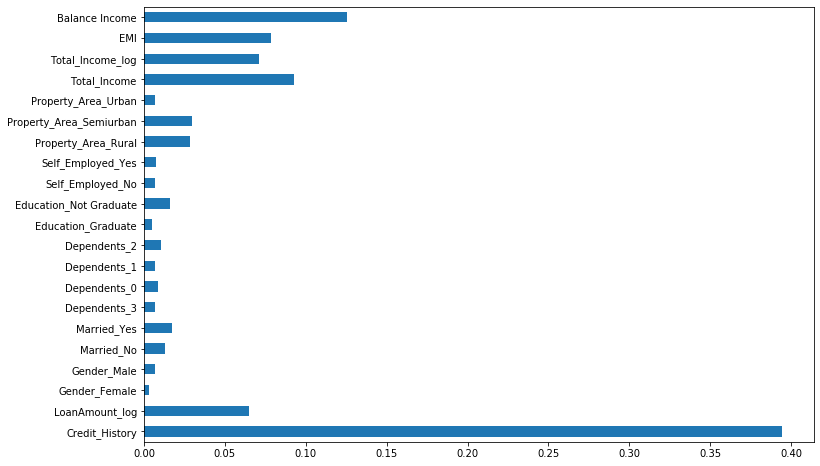

In [ ]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.
由图可见，信贷历史是最重要的特征，其次是剩余收入、总收入、EMI。 所以，特征工程可以帮助我们去预测目标变量。

OrA：

![%E5%B1%8F%E5%B9%95%E5%BF%AB%E7%85%A7%202020-04-20%20%E4%B8%8A%E5%8D%882.10.36.png](attachment:%E5%B1%8F%E5%B9%95%E5%BF%AB%E7%85%A7%202020-04-20%20%E4%B8%8A%E5%8D%882.10.36.png)

## XGBOOST
XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions. It’s a boosting algorithm and you may refer the below article to know more about boosting:https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

* n_estimator: This specifies the number of trees for the model.
* max_depth: We can specify maximum depth of a tree using this parameter.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = XGBClassifier(n_estimators=41, max_depth=5)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.7886178861788617

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7786885245901639


The mean validation accuracy for this model is 0.79



# Gird Search

In [ ]:
grid_search=GridSearchCV(XGBClassifier(random_state=1),paramgrid)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                  

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=81, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = XGBClassifier(n_estimators=81,max_depth=1)      #max_depth=1,n_estimators=81
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7868852459016393


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

In [ ]:
 (0.8130081300813008+0.8292682926829268+ 0.8048780487804879+0.7967479674796748+0.7868852459016393)/5

0.806157536985206

We got an accuracy of 0.73611 with this model.

After trying and testing 4 different algorithms, the best accuracy on the public leaderboard is achieved by Logistic
Regression (0.7847), followed by RandomForest (0.7638).

![%E5%B1%8F%E5%B9%95%E5%BF%AB%E7%85%A7%202020-04-24%20%E4%B8%8B%E5%8D%883.29.19.png](attachment:%E5%B1%8F%E5%B9%95%E5%BF%AB%E7%85%A7%202020-04-24%20%E4%B8%8B%E5%8D%883.29.19.png)

What more can be tried?

There are still quite a many things that can be tried to improve our models’ predictions. We create and add more variables, try different models with different subset of features and/or rows, etc. Some of the ideas are listed below:

We can train the XGBoost model using grid search to optimize its hyperparameters and improve the accuracy.
We can combine the applicants with 1,2,3 or more dependents and make a new feature as discussed in the EDA part.
We can also make independent vs independent variable visualizations to discover some more patterns.
We can also arrive at the EMI using a better formula which may include interest rates as well.
We can even try ensemble modeling (combination of different models). To read more about ensemble techniques you can refer these articles:
https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/
https://www.analyticsvidhya.com/blog/2015/09/questions-ensemble-modeling/